# Overview

Dates and times are abundant in data and essential for answering questions that start with when, how long, or how often. However, they can be tricky, as they come in a variety of formats and can behave in unintuitive ways. This article teaches you the essentials of parsing, manipulating, and computing with dates and times in R. By the end, we'll have mastered the lubridate package, a member of the tidyverse, specifically designed to handle dates and times. we'll also have applied the new skills to explore how often R versions are released, when the weather is good in Auckland (the birthplace of R), and how long monarchs ruled in Britain.

# Libraries

In [3]:
library(readr)
library(anytime)
library(ggplot2)
library(dplyr)
library(lubridate)

# Dates and Times in R

R doesn't know something is a date or time unless you tell it. We'll explore some of the ways R stores dates and times by exploring how often R versions are released, and how quickly people download them.

## Introduction to dates


> ### Dates
- Different conventions in different places
- 27th Feb 2013
  - **NZ**: 27/2/2013
  - **USA**: 2/27/2013

> ### The global standard numeric date format
![image.png](datasets/iso_announcement.png){% fn 1%}

> ### ISO 8601 YYYY-MM-DD
- Values ordered from the largest to smallest unit of time
- Each has a xed number of digits, must be padded with leadingzeros
- Either, no separators for computers, or - in dates
  - 1st of January 2011 -> 2011-01-01

> Dates in R
- Packages that importd ates:`readr`,`anytime`


In [4]:
2003-02-27

[1] 1974

In [5]:
as.Date("2003-02-27")

[1] "2003-02-27"

In [6]:
"2003-02-27"

[1] "2003-02-27"

In [7]:
str("2003-02-27")

 chr "2003-02-27"


In [8]:
str(as.Date("2003-02-27"))

 Date[1:1], format: "2003-02-27"


### Specifying dates

R doesn't know something is a date unless you tell it. If you have a character string that represents a date in the ISO 8601 standard you can turn it into a [Date](https://www.rdocumentation.org/packages/base/versions/3.4.1/topics/Dates) using the [`as.Date()`](https://www.rdocumentation.org/packages/base/topics/as.Date) function. Just pass the character string (or a vector of character strings) as the first argument.

We'll convert a character string representation of a date to a `Date` object.

In [9]:
# The date R 3.0.0 was released
x <- "2013-04-03"

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date("2014-04-10")
april_10_2014

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"


[1] "2014-04-10"

### Automatic import

Sometimes we'll need to input a couple of dates by hand using as.Date() but it's much more common to have a column of dates in a data file.

Some functions that read in data will automatically recognize and parse dates in a variety of formats. In particular the import functions, like [`read_csv()`](https://www.rdocumentation.org/packages/readr/topics/read_csv), in the `readr` package will recognize dates in a few common formats.

There is also the [`anytime()`](https://www.rdocumentation.org/packages/anytime/topics/anytime) function in the `anytime` package whose sole goal is to automatically parse strings as dates regardless of the format.

In [10]:
# Use read_csv() to import rversions.csv
releases <- read_csv('datasets/rversions.csv')

# Examine the structure of the date column
str(releases$date)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

Parsed with column specification:
cols(
  major = col_double(),
  minor = col_double(),
  patch = col_double(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 Date[1:105], format: "1997-12-04" "1997-12-21" "1998-01-10" "1998-03-14" "1998-05-02" ...


[1] "2009-09-10 EAT" "2009-09-10 EAT" "2009-09-10 EAT" "2009-09-10 EAT"

## Why use dates?

> ### Dates act like numbers
- Date objects are stored as days since 1970-01-01

In [11]:
as.Date("2020-07-13") > as.Date("2020-01-01")

[1] TRUE

In [12]:
as.Date("2020-07-10") + 3

[1] "2020-07-13"

In [13]:
as.Date("2020-07-13") - as.Date("2019-07-13")

Time difference of 366 days

> ### Plotting with dates

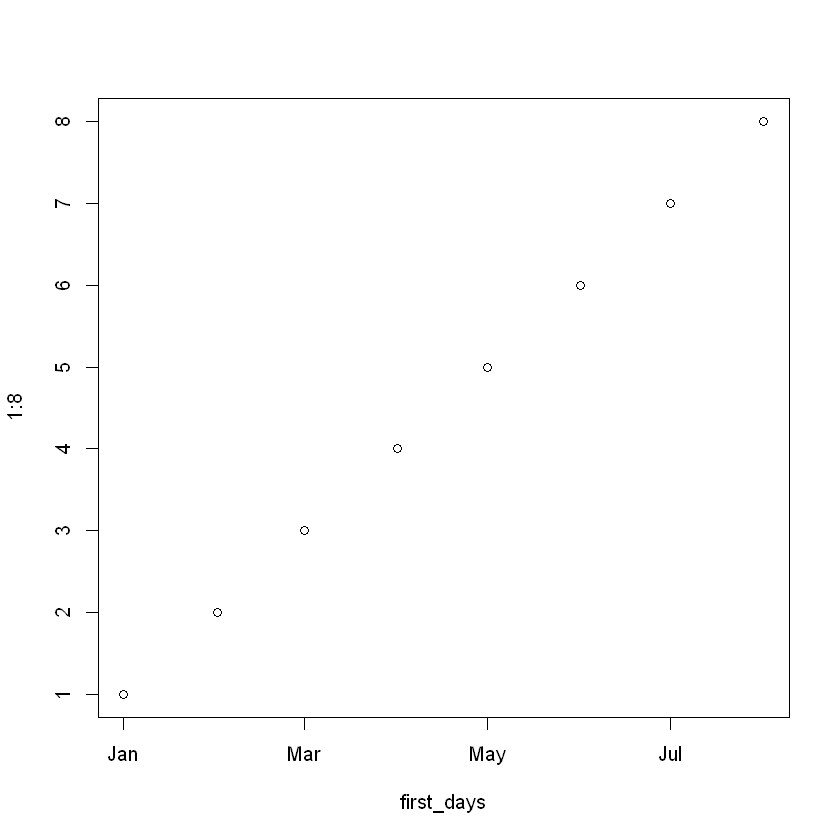

In [14]:
first_days = c(as.Date("2020-01-01"), as.Date("2020-02-01"), 
               as.Date("2020-03-01"), as.Date("2020-04-01"), 
               as.Date("2020-05-01"), as.Date("2020-06-01"), 
               as.Date("2020-07-01"), as.Date("2020-08-01"))
plot(first_days, 1:8)

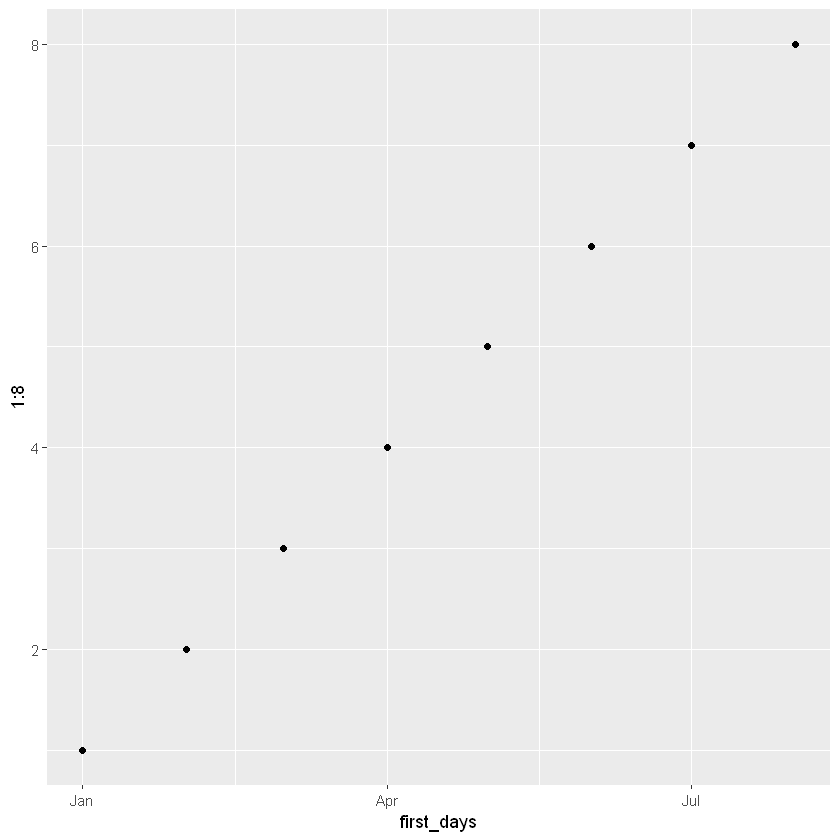

In [15]:
ggplot() + geom_point(aes(x=first_days, y=1:8))

> ### R releases

In [16]:
head(releases)

major,minor,patch,date,datetime,time,type
0,60,NA,1997-12-04,1997-12-04 08:47:58,08:47:58,patch
0,61,NA,1997-12-21,1997-12-21 13:09:22,13:09:22,minor
0,61,1,1998-01-10,1998-01-10 00:31:55,00:31:55,patch
0,61,2,1998-03-14,1998-03-14 19:25:55,19:25:55,patch
0,61,3,1998-05-02,1998-05-02 07:58:17,07:58:17,patch
0,62,NA,1998-06-14,1998-06-14 12:56:20,12:56:20,minor


### Plotting

If you plot a `Date` on the axis of a plot, you expect the dates to be in calendar order, and that's exactly what happens with [`plot()`](https://www.rdocumentation.org/packages/graphics/topics/plot) or [`ggplot()`](https://www.rdocumentation.org/packages/ggplot2/topics/ggplot).

We'll make some plots with the R version `releases` data using ggplot2. There are two big differences when a `Date` is on an axis:

1. If you specify limits they must be Date objects.
2. To control the behavior of the scale we'll use the `scale_x_date()` function.

Warning message:
"Removed 87 row(s) containing missing values (geom_path)."

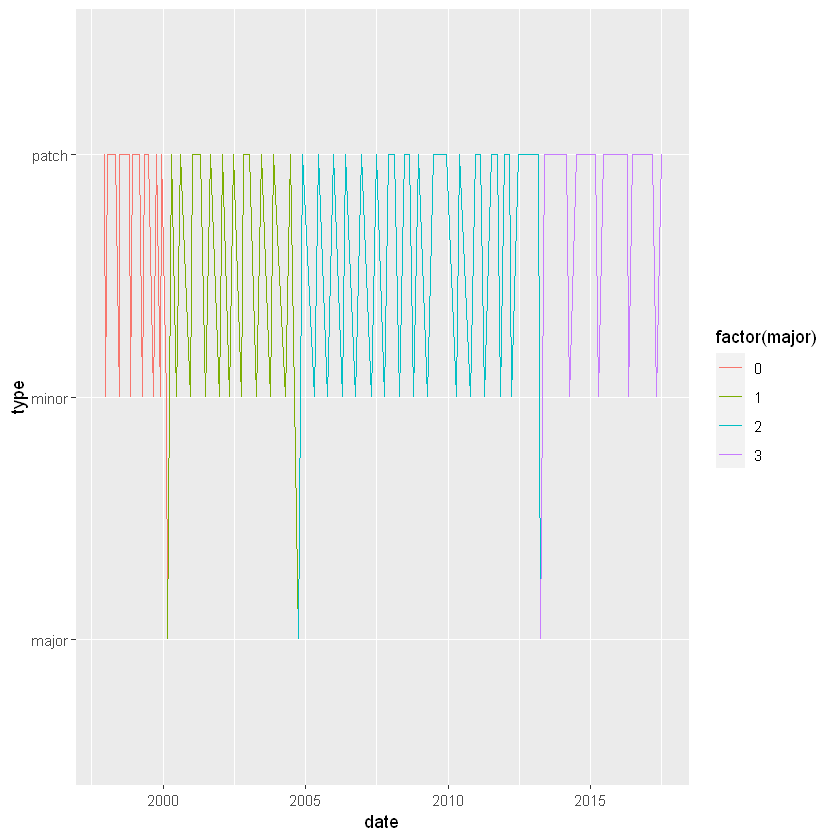

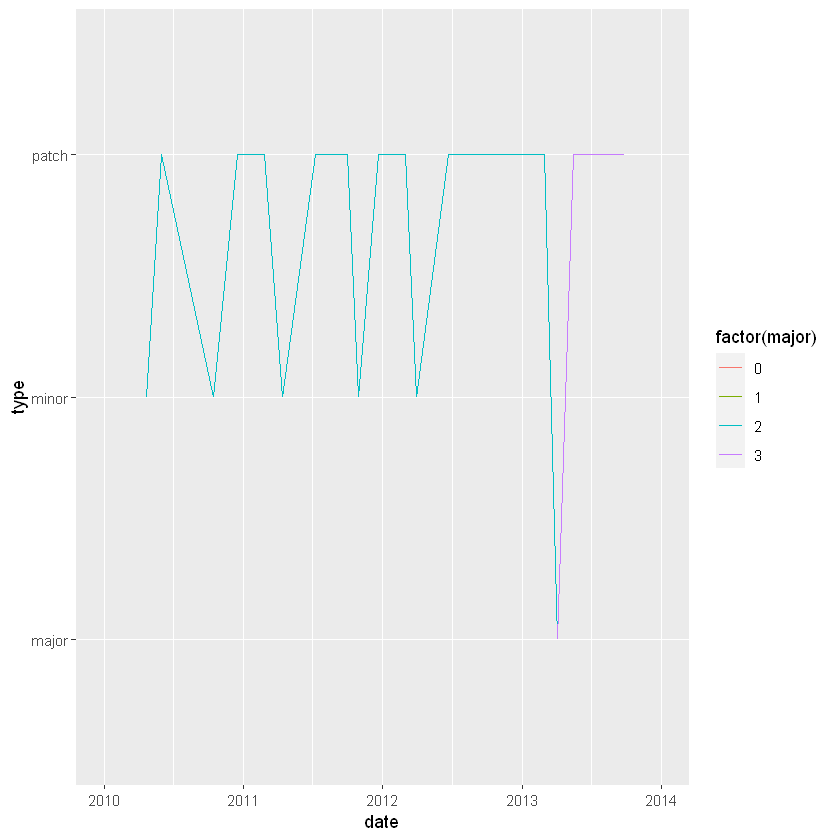

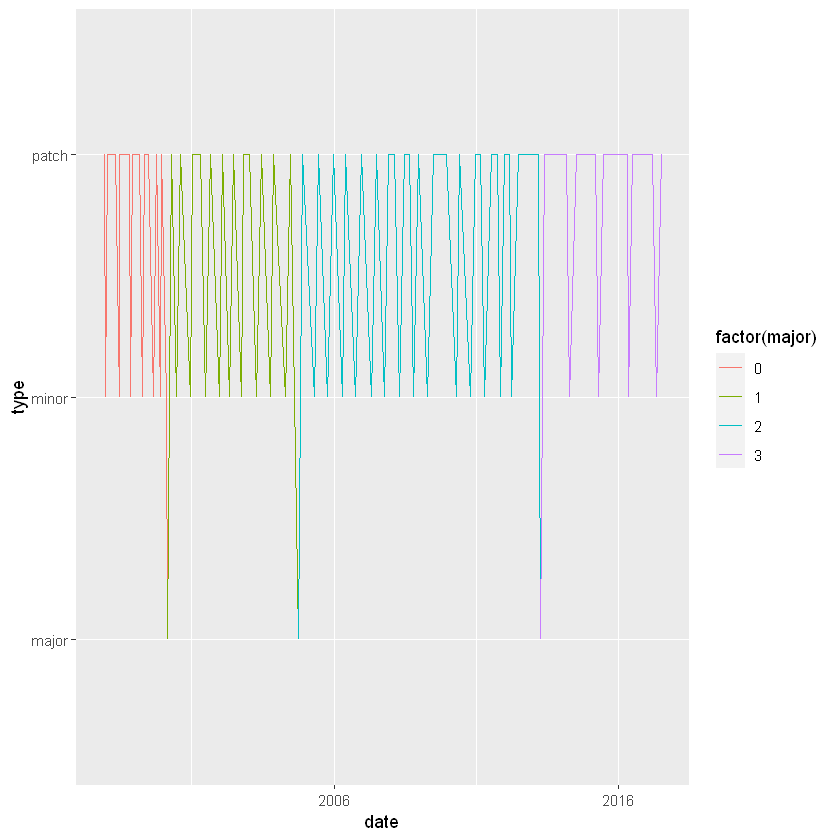

In [17]:
# Set the x axis to the date column
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major)))

# Limit the axis to between 2010-01-01 and 2014-01-01
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  xlim(as.Date("2010-01-01"), as.Date("2014-01-01"))

# Specify breaks every ten years and labels with "%Y"
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  scale_x_date(date_breaks = "10 years", date_labels = "%Y")

### Arithmetic and logical operators

Since `Date` objects are internally represented as the number of days since 1970-01-01 we can do basic math and comparisons with dates. We can compare dates with the usual [logical operators](https://www.rdocumentation.org/packages/base/topics/Comparison) (`<`, `==`, `>` etc.), find extremes with [`min()`](https://www.rdocumentation.org/packages/base/topics/min) and [`max()`](https://www.rdocumentation.org/packages/base/topics/max), and even subtract two dates to find out the time between them.

In [18]:
# Find the largest date
last_release_date <- max(releases$date)

# Filter row for last release
last_release <- filter(releases, date==last_release_date)

# Print last_release
last_release

# How long since last release?
Sys.Date() - last_release_date

major,minor,patch,date,datetime,time,type
3,4,1,2017-06-30,2017-06-30 07:04:11,07:04:11,patch


Time difference of 1109 days

 <a href="https://www.rdocumentation.org/packages/base/topics/Sys.date()">`Sys.date()`</a>- in the code, it simply returns today's date.

## What about times?

> ### ISO 8601
- HH:MM:SS
  - Largest unit to smallest
  - Fixed digits
    - Hours: 00 -- 24
    - Minutes: 00 -- 59
    - Seconds: 00 -- 60 (60 only for leap seconds)
  - No separator or :


> ### Datetimes in R
- Two objects types:
  - `POSIXlt` - list with named components
  - `POSIXct` - seconds since 1970-01-01 00:00:00
- `POSIXct` will go in a data frame
- `as.POSIXct()` turns a string into a `POSIXct` object

In [19]:
str(as.POSIXct("1997-06-15 00:01:00"))

 POSIXct[1:1], format: "1997-06-15 00:01:00"


> ### Timezones
- `"2013-02-27T18:00:00"`-6pm localtime
- `"2013-02-27T18:00:00Z"`-6pm UTC
- `"2013-02-27T18:00:00-08:00"`-6pmin Oregon

In [20]:
as.POSIXct("1997-06-15T18:00:59Z")

[1] "1997-06-15 EAT"

In [21]:
as.POSIXct("1997-06-15T18:00:59Z", tz="UTC")

[1] "1997-06-15 UTC"

> ### Datetimes behave nicely too
- Once a `POSIXct` object,datetimes can be:
  - Compared
  - Subtracted
  - Plotted


### Getting datetimes into R


Just like dates without times, if you want R to recognize a string as a datetime you need to convert it, although now you use <a href="https://www.rdocumentation.org/packages/base/topics/as.POSIXct()">`as.POSIXct()`</a>. `as.POSIXct()` expects strings to be in the format YYYY-MM-DD HH:MM:SS.

The only tricky thing is that times will be interpreted in local time based on your machine's set up. You can check your timezone with [`Sys.timezone()`](https://www.rdocumentation.org/packages/base/topics/Sys.timezone). If you want the time to be interpreted in a different timezone, you just set the `tz` argument of `as.POSIXct()`.

In [22]:
Sys.timezone()

[1] "Africa/Nairobi"

In [23]:
# Use as.POSIXct to enter the datetime 
as.POSIXct("2010-10-01 12:12:00")

# Use as.POSIXct again but set the timezone to `"America/Los_Angeles"`
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

# Examine structure of datetime column
str(releases$datetime)

[1] "2010-10-01 12:12:00 EAT"

[1] "2010-10-01 12:12:00 PDT"

 POSIXct[1:105], format: "1997-12-04 08:47:58" "1997-12-21 13:09:22" "1998-01-10 00:31:55" ...


### Datetimes behave nicely too

Just like `Date` objects, you can plot and do math with `POSIXct` objects. We'll see how quickly people download new versions of R, by examining the download logs from the RStudio CRAN mirror. R 3.2.0 was released at "2015-04-16 07:13:33" so `cran-logs_2015-04-17.csv` contains a random sample of downloads on the 16th, 17th and 18th.

In [24]:
# Import "cran-logs_2015-04-17.csv" with read_csv()
logs <- read_csv("datasets/cran-logs_2015-04-17.csv")

# Print logs
head(logs)

Parsed with column specification:
cols(
  datetime = col_datetime(format = ""),
  r_version = col_character(),
  country = col_character()
)


datetime,r_version,country
2015-04-16 22:40:19,3.1.3,CO
2015-04-16 09:11:04,3.1.3,GB
2015-04-16 17:12:37,3.1.3,DE
2015-04-18 12:34:43,3.2.0,GB
2015-04-16 04:49:18,3.1.3,PE
2015-04-16 06:40:44,3.1.3,TW


datetime,r_version,country


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


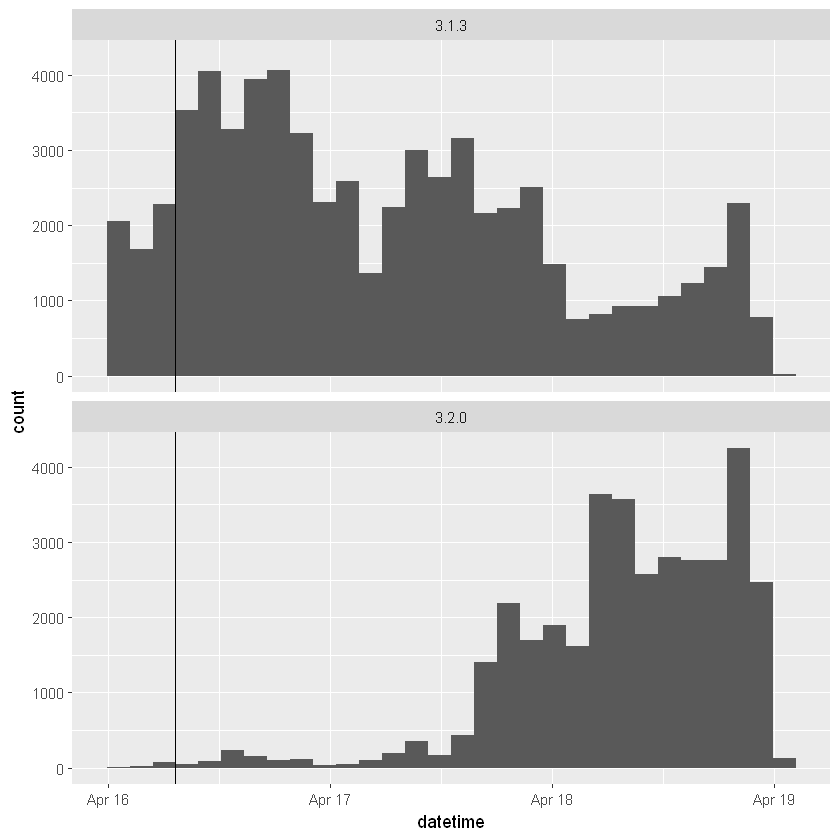

In [25]:
# Store the release time as a POSIXct object
release_time <- as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# When is the first download of 3.2.0?
logs %>% 
  filter(datetime==release_time,
    r_version == "3.2.0")

# Examine histograms of downloads by version
ggplot(logs, aes(x = datetime)) +
  geom_histogram() +
  geom_vline(aes(xintercept = as.numeric(release_time)))+
  facet_wrap(~ r_version, ncol = 1)

it takes about two days for downloads of the new version (3.2.0) to overtake downloads of the old version (3.1.3)

## Why lubridate?


> ### lubridate
- Make working with dates and times in R easy!
- `tidyverse` package
  - Plays nicely with builtin datetime objects
  - Designed for humans not computers
- Plays nicely with other `tidyverse` packages
- Consistent behaviour regardless of underlying object


> ### Parsing a wide range of formats

In [26]:
ymd("1997-06-15")

[1] "1997-06-15"

In [27]:
dmy("15/06/97")

[1] "1997-06-15"

In [28]:
parse_date_time(c("June 15th, 1997", "15th June, 1997"), order=c("mdy", "dmy"))

[1] "1997-06-15 UTC" "1997-06-15 UTC"

> ### Manipulating datetimes

In [29]:
akl_daily = read_csv("datasets/akl_weather_daily.csv")
head(akl_daily)

Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_double(),
  min_temp = col_double(),
  mean_temp = col_double(),
  mean_rh = col_double(),
  events = col_character(),
  cloud_cover = col_double()
)


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-9-1,60,51,56,75,NA,4
2007-9-2,60,53,56,82,Rain,4
2007-9-3,57,51,54,78,NA,6
2007-9-4,64,50,57,80,Rain,6
2007-9-5,53,48,50,90,Rain,7
2007-9-6,57,42,50,69,NA,1


In [30]:
akl_daily_m <- akl_daily %>%
    mutate(
        year = year(date),
        yday = yday(date),
        month = month(date, label=TRUE)
    )
head(akl_daily_m)

date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover,year,yday,month
2007-9-1,60,51,56,75,NA,4,2007,244,Sep
2007-9-2,60,53,56,82,Rain,4,2007,245,Sep
2007-9-3,57,51,54,78,NA,6,2007,246,Sep
2007-9-4,64,50,57,80,Rain,6,2007,247,Sep
2007-9-5,53,48,50,90,Rain,7,2007,248,Sep
2007-9-6,57,42,50,69,NA,1,2007,249,Sep


> ### Other lubridate features
- Handling timezones
- Fast parsing of standard formats
- Outputting datetimes


# Parsing and Manipulating Dates and Times with lubridate

Dates and times come in a huge assortment of formats, so the first hurdle is often to parse the format you have into an R datetime. We will explore how to import dates and times with the lubridate package. We'll also explore how to extract parts of a datetime. We'll practice by exploring the weather in R's birthplace, Auckland NZ.

## Parsing dates with lubridate

> ### ymd()
- 27th of February 2013
- `ymd()` - year, then month, then day

In [31]:
ymd("1997-06-15")

[1] "1997-06-15"

In [32]:
ymd("97/6/15")

[1] "1997-06-15"

In [33]:
ymd("97t6t15")

[1] "1997-06-15"

> ### Friends of ymd()
- `ymd()`,`ydm()`,`mdy()`,`myd()`,`dmy()`,`dym()`, `dmy_hm()`
- `parse_date_time(x = ___, order = ___)`

> ### Formatting characters
|Character|Meaning||Character|Meaning|
|---|---|---|---|---|
|`d`|numeric day of the month||`a`|Abbreviated weekday|
|`m`|month of the year||`A`|Full weekday|
|`y`|Year with century||`b`|Abbreviated month name|
|`Y`|year without century||`B`|full month name|
|`H`|hours (24 hours)||`I`|hours (12 hour)|
|`M`|minutes||`P`|AM/PM|
|`z`|Timezone, offset||||

### Selecting the right parsing function

`lubridate` provides a set of functions for parsing dates of a known order. For example, [`ymd()`](https://www.rdocumentation.org/packages/lubridate/topics/ymd) will parse dates with year first, followed by month and then day. The parsing is flexible, for example, it will parse the `m` whether it is numeric (e.g. `9` or `09`), a full month name (e.g. `September`), or an abbreviated month name (e.g. `Sep`).

All the functions with `y`, `m` and `d` in any order exist. If the dates have times as well, you can use the functions that start with `ymd`, `dmy`, `mdy` or `ydm` and are followed by any of `_h`, `_hm` or [`_hms`](https://www.rdocumentation.org/packages/lubridate/topics/ymd_hms).

In [34]:
# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

### Specifying an order with `parse_date_time()`

What about if you have something in a really weird order like `dym_msh`?There's no named function just for that order, but that is where [`parse_date_time()`](https://www.rdocumentation.org/packages/lubridate/topics/parse_date_time) comes in. `parse_date_time()` takes an additional argument, `orders`, where you can specify the order of the components in the date. 

For example, to parse `"2010 September 20th"` you could say `parse_date_time("2010 September 20th", orders = "ymd")` and that would be equivalent to using the `ymd()` function from the previous exercise.

One advantage of `parse_date_time()` is that you can use more format characters. For example, you can specify weekday names with `A`, `I` for 12 hour time, am/pm indicators with `p` and many others. Another big advantage is that you can specify a vector of orders, and that allows parsing of dates where multiple formats might be used.

In [35]:
# Specify an order string to parse x
x <- "Monday June 1st 2010 at 4pm"
parse_date_time(x, orders = "ABdyIp")

# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("Bdy", "Bdy", "Bdy", "dBy", "dBy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("d0mY", "0mY", "Y"))


[1] "2010-06-01 16:00:00 UTC"

[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

> Note:  when a date component is missing, it's just set to `1`? For example, the input `1253` resulted in the date `1253-01-01`.

## Weather in Auckland

> ### make_date(year, month, day)

In [36]:
make_date(year=1997, month=6, day=15)

[1] "1997-06-15"

`make_datetime(year, month, day, hour, min, sec)` for datetimes

> ### dplyr Review
- `mutate()` - add new columns (or overwrite old ones)
- `filter()` - subset rows
- `select()` - subset columns
- `arrange()` - order rows
- `summarise()` - summarise rows
- `group_by()` - useful in conjuction with `summarise()`


### Import daily weather data

In practice you won't be parsing isolated dates and times, they'll be part of a larger dataset. We'll be working with weather data from Auckland NZ.

There are two data sets: 
- `akl_weather_daily.csv` a set of once daily summaries for 10 years, and 
- `akl_weather_hourly_2016.csv` observations every half hour for 2016.

In [37]:
# Import CSV with read_csv()
akl_daily_raw <- read_csv("datasets/akl_weather_daily.csv")

# Print akl_daily_raw
head(akl_daily_raw)

Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_double(),
  min_temp = col_double(),
  mean_temp = col_double(),
  mean_rh = col_double(),
  events = col_character(),
  cloud_cover = col_double()
)


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-9-1,60,51,56,75,NA,4
2007-9-2,60,53,56,82,Rain,4
2007-9-3,57,51,54,78,NA,6
2007-9-4,64,50,57,80,Rain,6
2007-9-5,53,48,50,90,Rain,7
2007-9-6,57,42,50,69,NA,1


In [38]:
# Parse date 
akl_daily <- akl_daily_raw %>%
  mutate(date = ymd(date))

# Print akl_daily
head(akl_daily)

date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-09-01,60,51,56,75,NA,4
2007-09-02,60,53,56,82,Rain,4
2007-09-03,57,51,54,78,NA,6
2007-09-04,64,50,57,80,Rain,6
2007-09-05,53,48,50,90,Rain,7
2007-09-06,57,42,50,69,NA,1


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

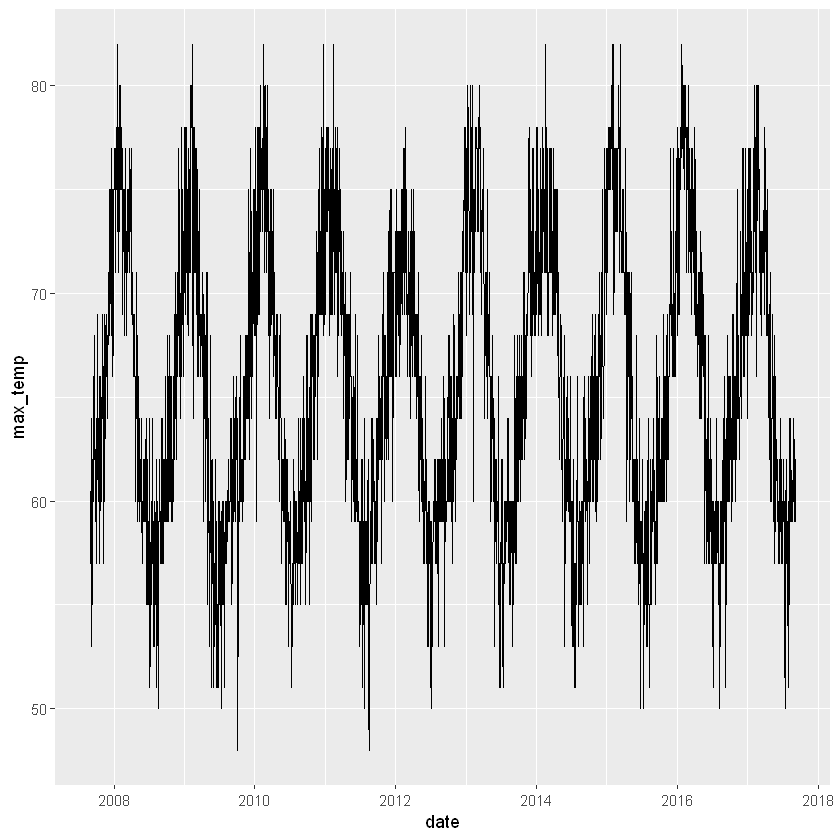

In [39]:
# Plot to check work
akl_daily %>%
    ggplot(aes(x = date, y = max_temp)) +
        geom_line() 

The temperatures are in farenheit. Yup, summer falls in Dec-Jan-Feb.

### Import hourly weather data

The hourly data is a little different. The date information is spread over three columns `year`, `month` and `mday`, so we'll need to use `make_date()` to combine them.

In [40]:
akl_hourly_raw <- read_csv("datasets/akl_weather_hourly_2016.csv")
head(akl_hourly_raw)

Parsed with column specification:
cols(
  year = col_double(),
  month = col_double(),
  mday = col_double(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_double(),
  date_utc = col_datetime(format = "")
)


year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc
2016,1,1,00:00:00,68,Clear,Clear,NA,68,2015-12-31 11:00:00
2016,1,1,00:30:00,68,Clear,Clear,NA,68,2015-12-31 11:30:00
2016,1,1,01:00:00,68,Clear,Clear,NA,73,2015-12-31 12:00:00
2016,1,1,01:30:00,68,Clear,Clear,NA,68,2015-12-31 12:30:00
2016,1,1,02:00:00,68,Clear,Clear,NA,68,2015-12-31 13:00:00
2016,1,1,02:30:00,68,Clear,Clear,NA,68,2015-12-31 13:30:00


Then the time information is in a separate column again, `time`. It's quite common to find `date` and `time` split across different variables. One way to construct the datetimes is to paste the date and time together and then parse them.


In [41]:
# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Print date, time and datetime columns of akl_hourly
akl_hourly %>% 
    select(date, time, datetime) %>%
        head()

date,time,datetime
2016-01-01,00:00:00,2016-01-01 00:00:00
2016-01-01,00:30:00,2016-01-01 00:30:00
2016-01-01,01:00:00,2016-01-01 01:00:00
2016-01-01,01:30:00,2016-01-01 01:30:00
2016-01-01,02:00:00,2016-01-01 02:00:00
2016-01-01,02:30:00,2016-01-01 02:30:00


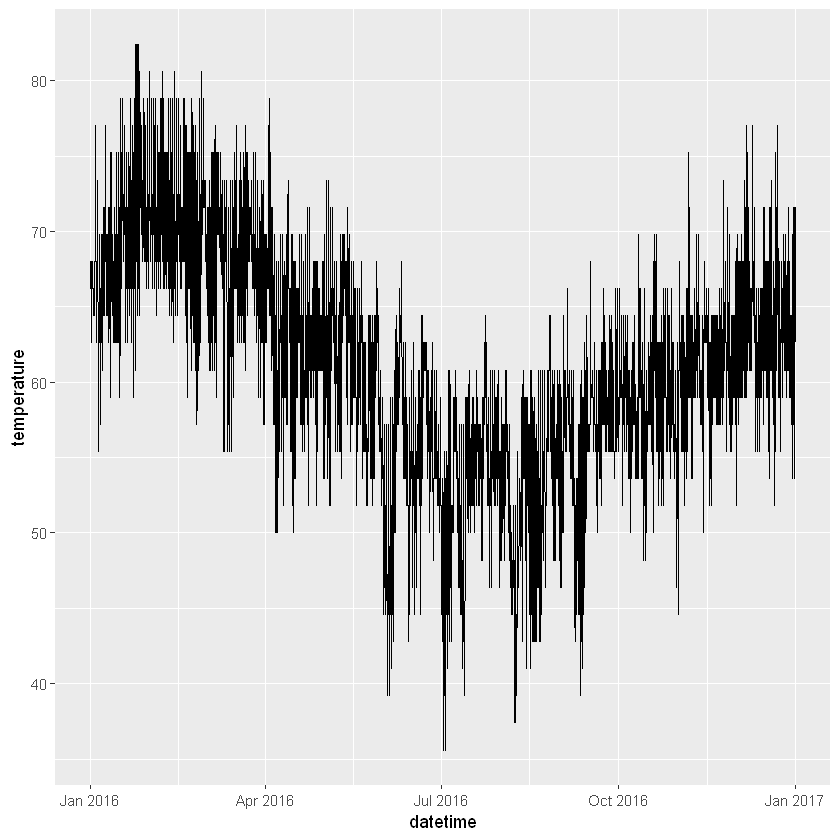

In [42]:
# Plot to check work
akl_hourly %>%
    ggplot(aes(x = datetime, y = temperature)) +
        geom_line()


It's interesting how the day to day variation is about half the size of the yearly variation.

{{'source: [https://xkcd.com/1179](https://xkcd.com/1179)' | fndetail 1}}